In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler , MinMaxScaler , LabelEncoder
import kagglehub



# AMAN

In [ ]:

url = "https://drive.google.com/uc?id=1SZzVrF_t3WmgNdSUlo-XaTdkBGHMd54r&export=download"
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)



In [ ]:
df

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31706,49,Writer,37188.10,1,4,5,3,7,12,5.38,3.0,Good,620.64,39.080823,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good,357
31707,49,Writer,37188.10,1,4,5,3,7,12,5.38,3.0,Good,620.64,32.803431,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good,358
31708,49,Writer,37188.10,1,4,5,3,3,12,5.38,3.0,Good,620.64,36.979007,NM,84.205949,215.486386,Low_spent_Small_value_payments,300.008498,Good,360
31709,50,Writer,37188.10,1,4,5,3,5,12,5.38,3.0,Good,620.64,37.753013,NM,84.205949,147.339908,Low_spent_Small_value_payments,368.154976,Good,362


In [ ]:
df.shape

(31711, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31711 entries, 0 to 31710
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        31711 non-null  int64  
 1   Occupation                 31711 non-null  object 
 2   Annual_Income              31711 non-null  float64
 3   Num_Bank_Accounts          31711 non-null  int64  
 4   Num_Credit_Card            31711 non-null  int64  
 5   Interest_Rate              31711 non-null  int64  
 6   Num_of_Loan                31711 non-null  int64  
 7   Delay_from_due_date        31711 non-null  int64  
 8   Num_of_Delayed_Payment     31711 non-null  int64  
 9   Changed_Credit_Limit       31711 non-null  float64
 10  Num_Credit_Inquiries       31711 non-null  float64
 11  Credit_Mix                 31711 non-null  object 
 12  Outstanding_Debt           31711 non-null  float64
 13  Credit_Utilization_Ratio   31711 non-null  flo

In [ ]:
df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
count,31711.000000,3.171100e+04,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000
mean,35.135032,1.749045e+05,4.415818,4.801583,10.256504,2.234114,14.985967,26.493299,8.601820,3.903030,776.983756,32.522218,59.287714,181.502288,439.647331,243.861026
std,11.037186,1.415577e+06,2.305062,1.673844,5.916633,1.700965,9.353937,215.388313,5.119076,2.813889,443.968460,5.135545,53.461204,196.253121,225.424866,108.853693
min,14.000000,7.006520e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.832487,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2.211810e+04,3.000000,4.000000,6.000000,1.000000,8.000000,6.000000,4.550000,2.000000,388.920000,28.299138,16.414812,61.938256,293.841559,195.000000
50%,35.000000,3.699394e+04,4.000000,5.000000,9.000000,2.000000,13.000000,11.000000,8.370000,4.000000,780.210000,32.501616,46.162077,121.191802,369.698223,256.000000
75%,44.000000,7.452061e+04,6.000000,6.000000,14.000000,3.000000,22.000000,15.000000,11.620000,6.000000,1182.500000,36.731398,89.163419,225.891543,523.103061,329.000000
max,56.000000,2.419806e+07,10.000000,10.000000,34.000000,9.000000,60.000000,4397.000000,26.900000,12.000000,1499.920000,49.564519,199.904691,1903.080048,1602.040519,404.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


In [ ]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Age_Months'],
      dtype='object')

In [ ]:
df.sample(5)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
21320,23,Entrepreneur,22222.15,7,6,20,4,26,9,14.91,8.0,Standard,81.68,36.504506,Yes,44.470649,238.807215,Low_spent_Small_value_payments,188.206720,Standard,326
16836,44,Entrepreneur,11391.83,8,5,1,4,17,19,10.02,4.0,Standard,589.97,39.983954,No,60.293751,36.118659,Low_spent_Small_value_payments,301.803767,Standard,233
30758,25,Teacher,59683.10,4,3,5,2,23,20,1.04,3.0,Standard,121.26,31.256313,No,93.664875,535.459401,Low_spent_Medium_value_payments,170.734891,Standard,322
8236,18,Engineer,21695.12,8,6,17,5,11,8,12.44,6.0,Standard,1120.28,30.356241,Yes,85.076936,97.684576,Low_spent_Small_value_payments,275.731155,Standard,0
6229,17,Developer,49639.20,8,5,13,2,14,10,14.71,7.0,Standard,451.16,31.300500,Yes,45.020286,438.324516,Low_spent_Medium_value_payments,233.115198,Standard,95


In [ ]:
# Separate numerical and categorical columns


num_col = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_col = df.select_dtypes(include=["object"]).columns.tolist()

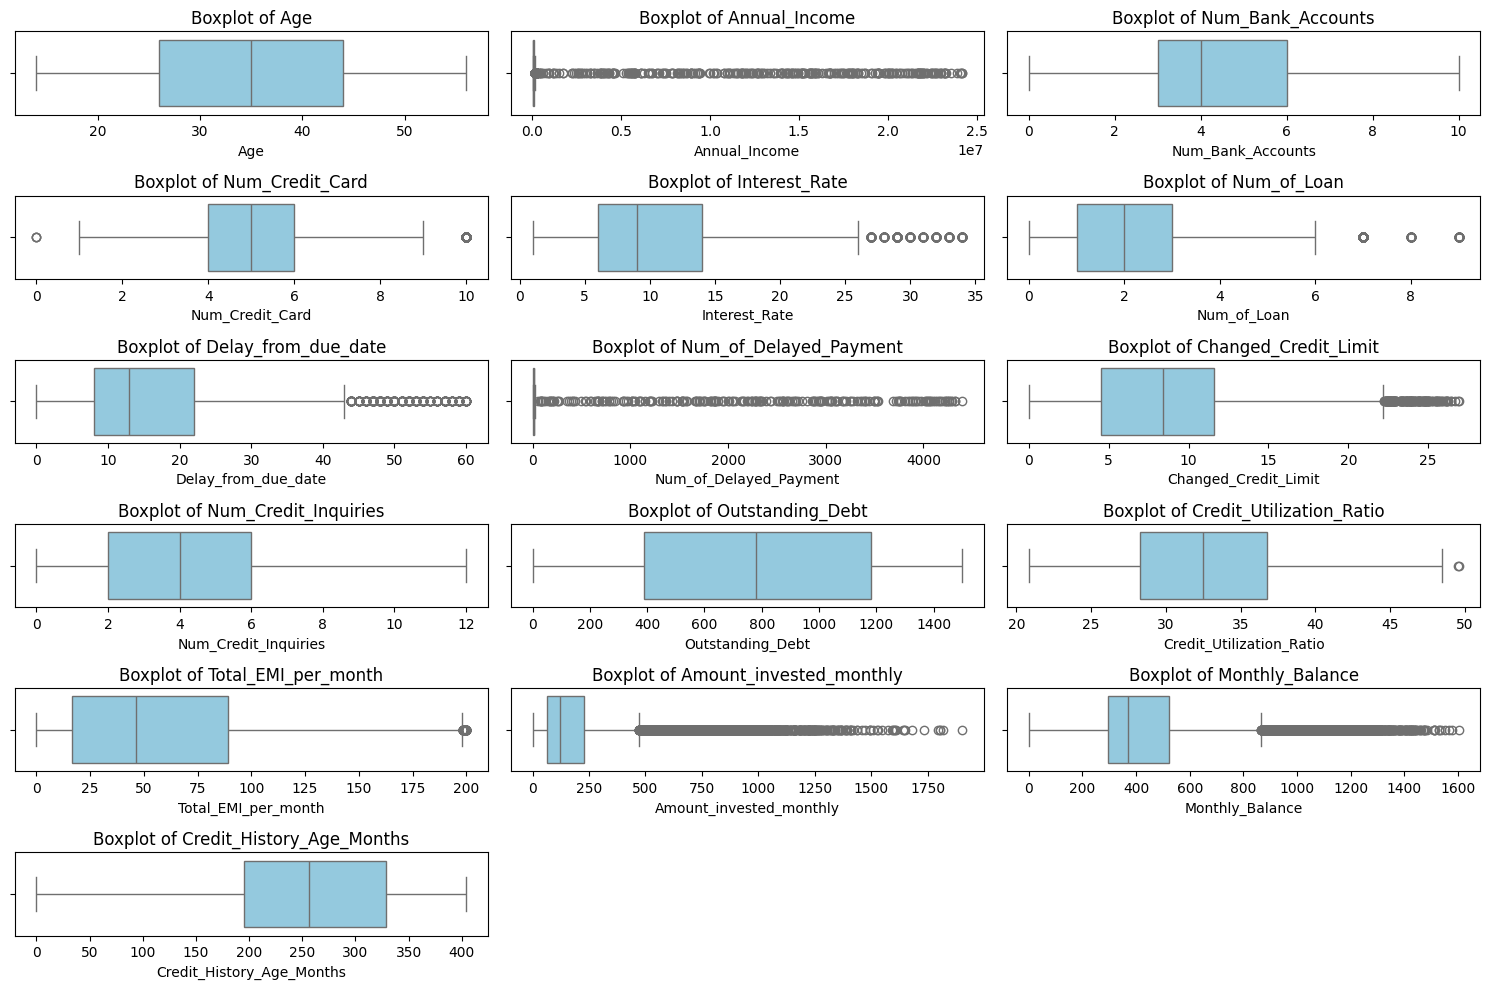

In [ ]:
# Function to plot boxplots for numerical columns
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot((len(columns) // 3) + 1, 3, i)  # Create subplots in a grid
        sns.boxplot(data=df, x=col, color="skyblue")
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()

# Plot boxplots for numerical columns
plot_boxplots(df, num_col)

# Show the plots
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Interest_Rate'
Q1 = df["Interest_Rate"].quantile(0.25)
Q3 = df["Interest_Rate"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
# Replace outliers with the median of the 'Interest_Rate' column
median_interest_rate = df["Interest_Rate"].median()
df.loc[df["Interest_Rate"] < lower_bound, "Interest_Rate"] = median_interest_rate
df.loc[df["Interest_Rate"] > upper_bound, "Interest_Rate"] = median_interest_rate

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Num_of_Loan'
Q1 = df["Num_of_Loan"].quantile(0.25)
Q3 = df["Num_of_Loan"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
# Replace outliers in 'Num_of_Loan' with the median
median_num_of_loan = df["Num_of_Loan"].median()
df.loc[df["Num_of_Loan"] < lower_bound, "Num_of_Loan"] = median_num_of_loan
df.loc[df["Num_of_Loan"] > upper_bound, "Num_of_Loan"] = median_num_of_loan

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Delay_from_due_date'
Q1 = df["Delay_from_due_date"].quantile(0.25)
Q3 = df["Delay_from_due_date"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Replace outliers in 'Delay_from_due_date' with the median
median_delay_from_due_date = df["Delay_from_due_date"].median()
df.loc[df["Delay_from_due_date"] < lower_bound, "Delay_from_due_date"] = median_delay_from_due_date
df.loc[df["Delay_from_due_date"] > upper_bound, "Delay_from_due_date"] = median_delay_from_due_date

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Changed_Credit_Limit'
Q1 = df["Changed_Credit_Limit"].quantile(0.25)
Q3 = df["Changed_Credit_Limit"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
# Replace outliers in 'Changed_Credit_Limit' with the median
median_changed_credit_limit = df["Changed_Credit_Limit"].median()
df.loc[df["Changed_Credit_Limit"] < lower_bound, "Changed_Credit_Limit"] = median_changed_credit_limit
df.loc[df["Changed_Credit_Limit"] > upper_bound, "Changed_Credit_Limit"] = median_changed_credit_limit


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Total_EMI_per_month'
Q1 = df["Total_EMI_per_month"].quantile(0.25)
Q3 = df["Total_EMI_per_month"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Replace outliers in 'Total_EMI_per_month' with the median
median_total_emi_per_month = df["Total_EMI_per_month"].median()
df.loc[df["Total_EMI_per_month"] < lower_bound, "Total_EMI_per_month"] = median_total_emi_per_month
df.loc[df["Total_EMI_per_month"] > upper_bound, "Total_EMI_per_month"] = median_total_emi_per_month


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Annual_Income'
Q1 = df["Annual_Income"].quantile(0.25)
Q3 = df["Annual_Income"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in 'Annual_Income'
outliers_annual_income = df[(df["Annual_Income"] < lower_bound) | (df["Annual_Income"] > upper_bound)]
print(f"Number of outliers in Annual_Income: {len(outliers_annual_income)}")

# Optional: Show the outlier values
print("Outliers in Annual_Income:\n", outliers_annual_income)

Number of outliers in Annual_Income: 776
Outliers in Annual_Income:
        Age  Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
79      40   Architect     6515990.00                  6                3   
81      55   Scientist      586359.00                  1                5   
120     30     Teacher     2709655.00                  2                6   
149     18   Scientist    19257912.00                  0                3   
234     55      Doctor     8908998.00                  1                7   
...    ...         ...            ...                ...              ...   
31355   49  Journalist      175718.64                  3                5   
31407   49    Mechanic    19805347.00                  6                4   
31448   21     Manager    18721299.00                  4                7   
31572   31      Lawyer     5794377.00                  5                4   
31603   53   Architect     8544730.00                  5                4   

      

In [ ]:
# Cap the outliers in 'Annual_Income' by setting them to the lower and upper bounds
df["Annual_Income"] = df["Annual_Income"].clip(lower=lower_bound, upper=upper_bound)

# Verify if the values are capped
outliers_annual_income_after_clipping = df[(df["Annual_Income"] < lower_bound) | (df["Annual_Income"] > upper_bound)]

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Num_of_Delayed_Payment'
Q1 = df["Num_of_Delayed_Payment"].quantile(0.25)
Q3 = df["Num_of_Delayed_Payment"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in 'Num_of_Delayed_Payment'
outliers_num_of_delayed_payment = df[(df["Num_of_Delayed_Payment"] < lower_bound) | (df["Num_of_Delayed_Payment"] > upper_bound)]
print(f"Number of outliers in Num_of_Delayed_Payment: {len(outliers_num_of_delayed_payment)}")

# Optional: Show the outlier values
print("Outliers in Num_of_Delayed_Payment:\n", outliers_num_of_delayed_payment)


Number of outliers in Num_of_Delayed_Payment: 235
Outliers in Num_of_Delayed_Payment:
        Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
172     47    Accountant       17787.34                  8                4   
199     18     Developer       27070.07                  7                3   
347     31    Accountant       59971.42                  8                5   
523     32     Architect       26716.09                  4                5   
568     31  Entrepreneur       60552.76                  3                7   
...    ...           ...            ...                ...              ...   
31218   45       Teacher       28702.52                  5                6   
31235   30        Writer       37769.92                  7                4   
31297   38    Accountant       23737.09                  4                5   
31527   28        Lawyer       21471.58                  7                3   
31640   44        Doctor       32625.59     

In [ ]:
# Cap the outliers in 'Num_of_Delayed_Payment' by setting them to the upper bound
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].clip(upper=upper_bound)

# Verify if the values are capped
outliers_after_clipping = df[(df["Num_of_Delayed_Payment"] > upper_bound)]

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Amount_invested_monthly'
Q1 = df["Amount_invested_monthly"].quantile(0.25)
Q3 = df["Amount_invested_monthly"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in 'Amount_invested_monthly'
outliers_amount_invested_monthly = df[(df["Amount_invested_monthly"] < lower_bound) | (df["Amount_invested_monthly"] > upper_bound)]
print(f"Number of outliers in Amount_invested_monthly: {len(outliers_amount_invested_monthly)}")

# Optional: Show the outlier values
print("Outliers in Amount_invested_monthly:\n", outliers_amount_invested_monthly)


Number of outliers in Amount_invested_monthly: 2491
Outliers in Amount_invested_monthly:
        Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
18      31        Lawyer       73928.46                  4                5   
31      33      Engineer       88640.24                  3                6   
34      35  Entrepreneur       54392.16                  6                4   
37      36  Entrepreneur       54392.16                  6                4   
47      20    Accountant       92047.08                  6                7   
...    ...           ...            ...                ...              ...   
31575   31        Lawyer      107911.60                  3                3   
31578   32        Lawyer      107911.60                  3                3   
31592   33     Architect      108484.38                  4                7   
31666   31      Mechanic       64511.34                  7                3   
31672   39       Manager       85744.12  

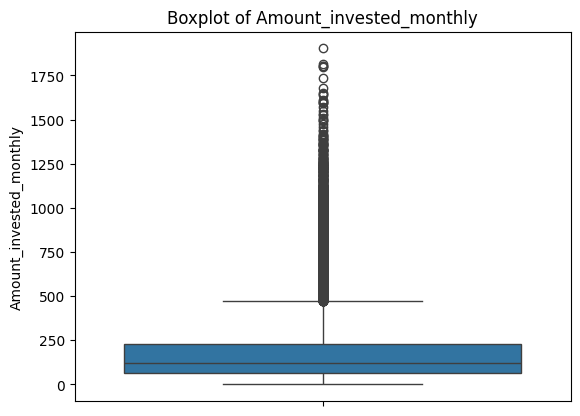

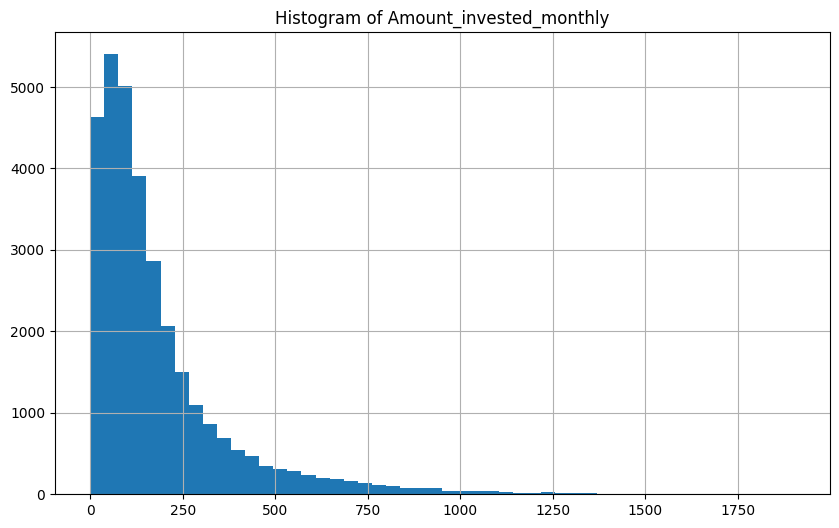

In [ ]:
# Plot the distribution of 'Amount_invested_monthly'
sns.boxplot(df['Amount_invested_monthly'])
plt.title('Boxplot of Amount_invested_monthly')
plt.show()

# Histogram of 'Amount_invested_monthly'
df['Amount_invested_monthly'].hist(bins=50, figsize=(10, 6))
plt.title('Histogram of Amount_invested_monthly')
plt.show()

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].clip(lower=lower_bound, upper=upper_bound)


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Monthly_Balance'
Q1 = df["Monthly_Balance"].quantile(0.25)
Q3 = df["Monthly_Balance"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in 'Monthly_Balance'
outliers_Monthly_Balance = df[(df["Monthly_Balance"] < lower_bound) | (df["Monthly_Balance"] > upper_bound)]
print(f"Number of outliers in Monthly_Balance: {len(outliers_Monthly_Balance)}")

# Optional: Show the outlier values
print("Outliers in Monthly_Balance:\n", outliers_Monthly_Balance)


Number of outliers in Monthly_Balance: 2033
Outliers in Monthly_Balance:
        Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
48      20    Accountant       92047.08                  6                7   
49      20    Accountant       92047.08                  6                7   
129     42     Developer      123732.32                  4                3   
131     43     Developer      123732.32                  4                3   
137     45  Entrepreneur      118248.60                  5                1   
...    ...           ...            ...                ...              ...   
31573   31        Lawyer      146310.68                  5                4   
31574   31        Lawyer      146310.68                  5                4   
31576   31        Lawyer      107911.60                  3                3   
31577   31        Lawyer      107911.60                  3                3   
31597   34     Architect      108484.38                  

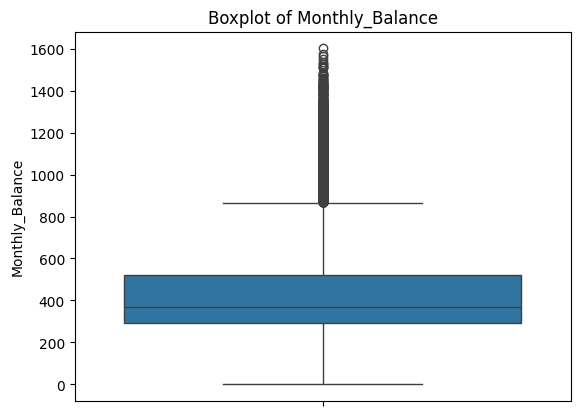

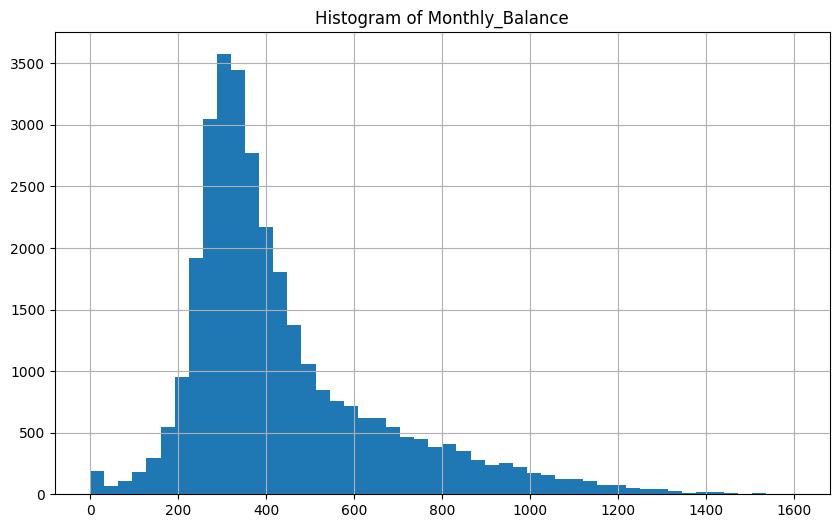

In [ ]:

# Plot the distribution of 'Monthly_Balance'
sns.boxplot(df['Monthly_Balance'])
plt.title('Boxplot of Monthly_Balance')
plt.show()

# Histogram of 'Monthly_Balance'
df['Monthly_Balance'].hist(bins=50, figsize=(10, 6))
plt.title('Histogram of Monthly_Balance')
plt.show()


In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].clip(lower=lower_bound, upper=upper_bound)


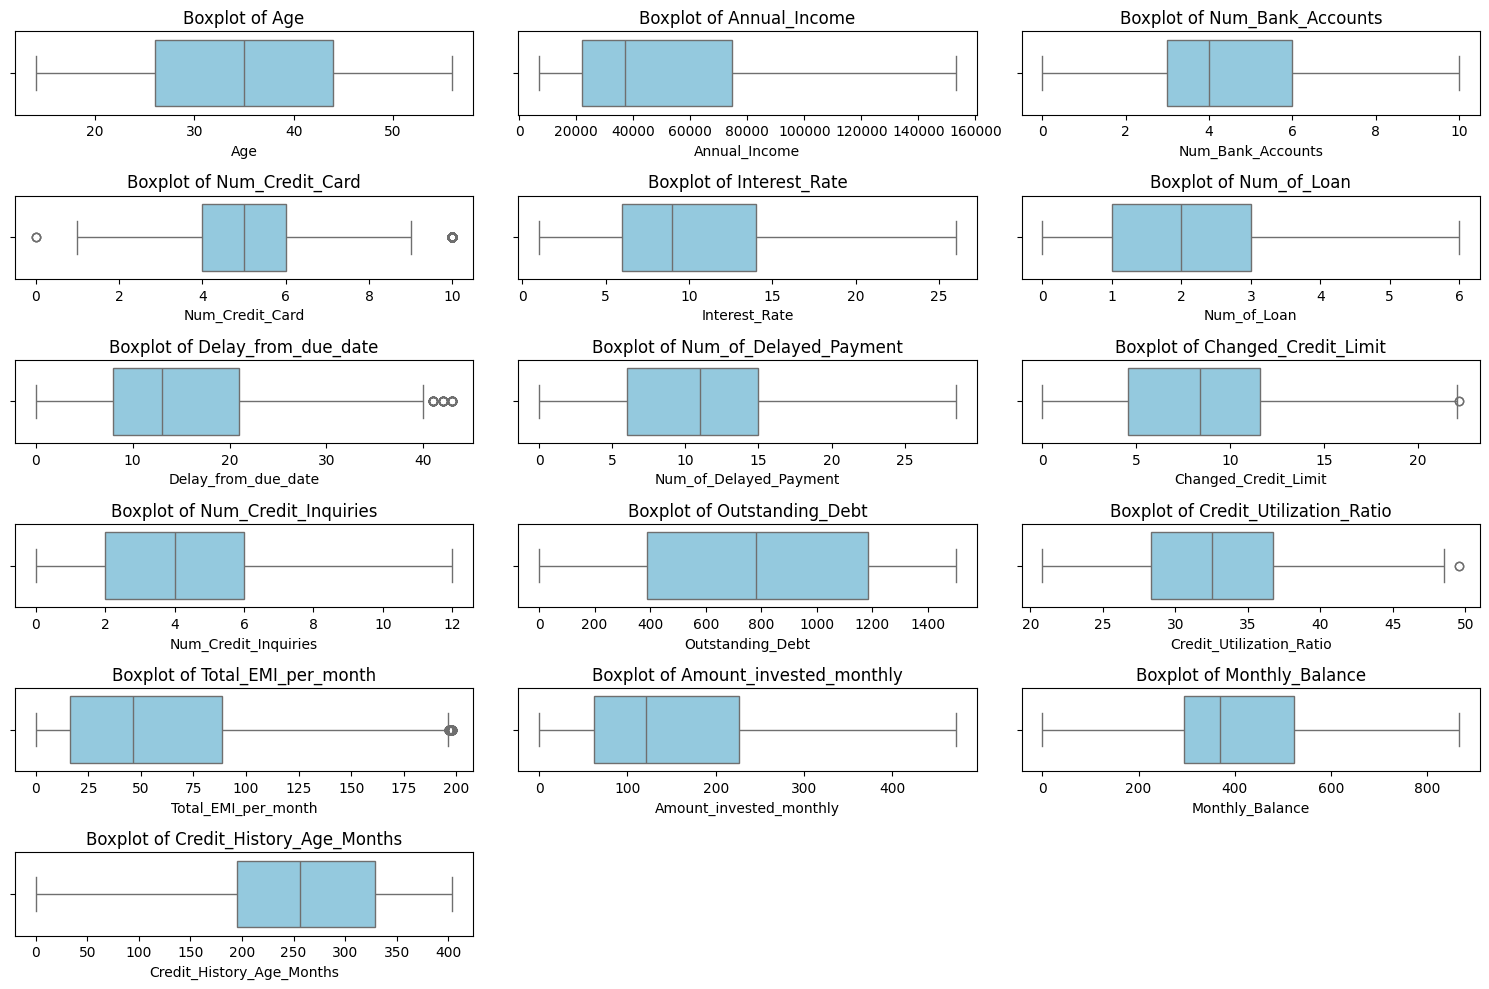

In [ ]:
def plot_boxplots1(df, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot((len(columns) // 3) + 1, 3, i)  # Create subplots in a grid
        sns.boxplot(data=df, x=col, color="skyblue")
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()

# Plot boxplots for numerical columns
plot_boxplots1(df, num_col)

# Show the plots
plt.show()

In [ ]:
cat_col

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
Lawyer,2401
Architect,2328
Media_Manager,2144
Teacher,2130
Accountant,2111
Developer,2105
Scientist,2102
Musician,2098
Journalist,2093


In [ ]:
data =  pd.get_dummies(df,columns=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score'],dtype="int")

In [ ]:
data.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,23,19114.12,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,268,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
1,23,19114.12,3,4,3,4,6,0.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,269,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
2,23,19114.12,3,4,3,4,3,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317,271,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
3,23,19114.12,3,4,3,4,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
4,28,34847.84,2,4,6,1,7,1.0,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214,320,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


In [ ]:
num_col

['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Age_Months']

In [ ]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320


In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
data[num_col] = scaler.fit_transform(df[num_col])


In [ ]:
data.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.126516,-1.032354,-0.451218,0.034462,0.074322,-0.222834,-0.173673,0.268851,-1.050343,0.221760,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
1,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.008333,-1.666946,0.546050,0.034462,0.074322,-1.504221,-0.173673,-0.884119,-0.446141,0.230946,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
2,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.362883,-0.397761,0.546050,0.034462,0.074322,-1.944250,-0.173673,0.114813,-0.942267,0.249320,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
3,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.362883,-0.715057,0.546050,0.034462,0.074322,-1.672375,-0.173673,-1.005480,-0.360991,-2.240299,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
4,-0.646464,-0.462650,-1.048066,-0.478895,-0.733569,-0.732683,-0.890149,-1.508298,-0.221846,-0.676310,-0.387317,1.173921,-0.756089,-0.891626,0.286357,0.699473,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


In [ ]:
#  All the data in "df" is as it is ........... The changes made after Encoding and Scaling are saved in a "data".

**GURI**

# **EDA**

In [ ]:
data.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.126516,-1.032354,-0.451218,0.034462,0.074322,-0.222834,-0.173673,0.268851,-1.050343,0.221760,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
1,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.008333,-1.666946,0.546050,0.034462,0.074322,-1.504221,-0.173673,-0.884119,-0.446141,0.230946,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
2,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.362883,-0.397761,0.546050,0.034462,0.074322,-1.944250,-0.173673,0.114813,-0.942267,0.249320,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
3,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.362883,-0.715057,0.546050,0.034462,0.074322,-1.672375,-0.173673,-1.005480,-0.360991,-2.240299,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
4,-0.646464,-0.462650,-1.048066,-0.478895,-0.733569,-0.732683,-0.890149,-1.508298,-0.221846,-0.676310,-0.387317,1.173921,-0.756089,-0.891626,0.286357,0.699473,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


<Axes: ylabel='Age'>

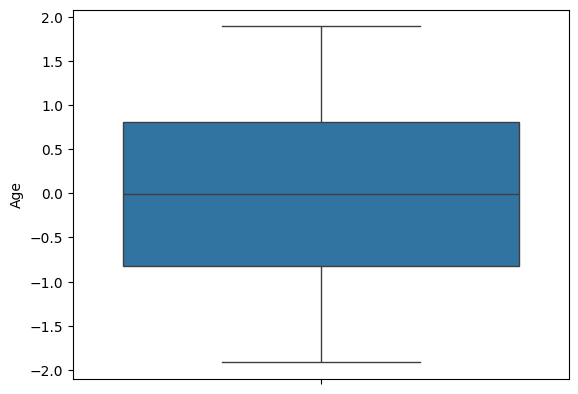

In [ ]:
sns.boxplot(data['Age'])

<Axes: ylabel='Annual_Income'>

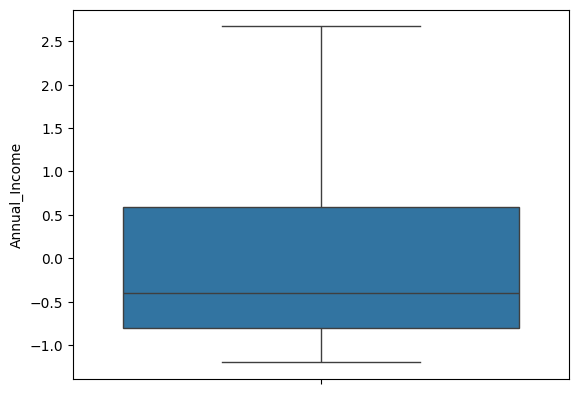

In [ ]:
sns.boxplot(data['Annual_Income'])

<Axes: ylabel='Num_Bank_Accounts'>

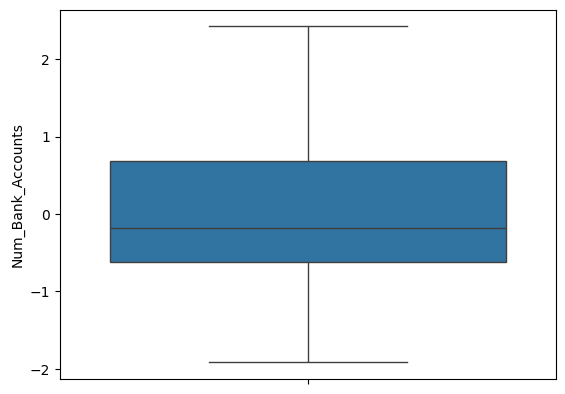

In [ ]:
sns.boxplot(data['Num_Bank_Accounts'])

<Axes: ylabel='Num_Credit_Card'>

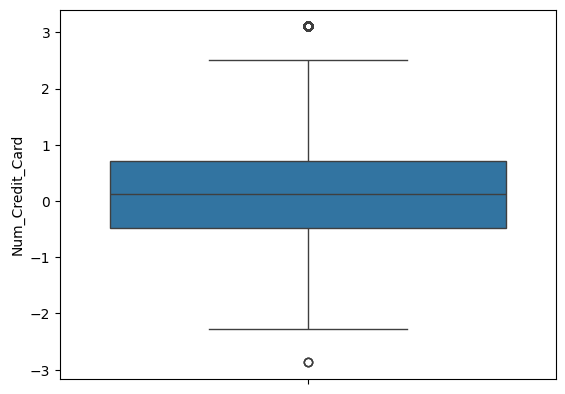

In [ ]:
sns.boxplot(data['Num_Credit_Card'])

<Axes: ylabel='Interest_Rate'>

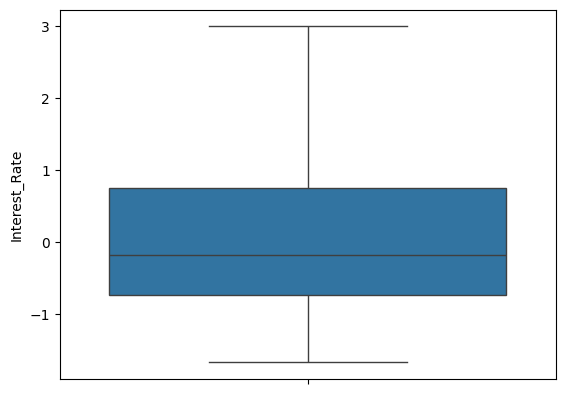

In [ ]:
sns.boxplot(data['Interest_Rate'])

<Axes: ylabel='Num_of_Loan'>

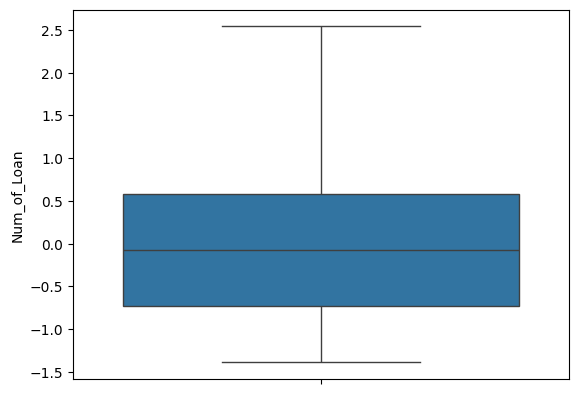

In [ ]:
sns.boxplot(data['Num_of_Loan'])

<Axes: ylabel='Delay_from_due_date'>

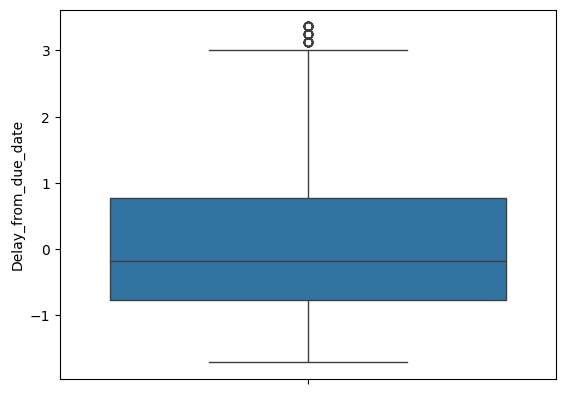

In [ ]:
sns.boxplot(data['Delay_from_due_date'])

<Axes: ylabel='Num_of_Delayed_Payment'>

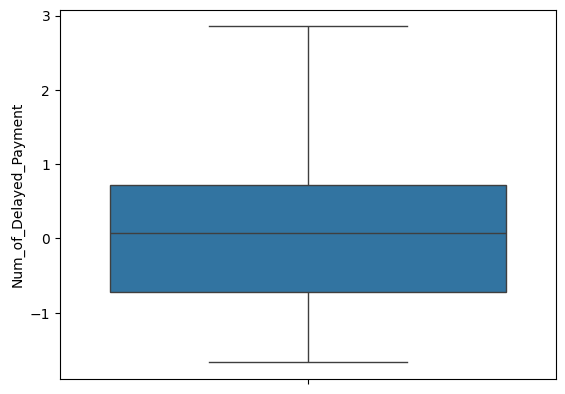

In [ ]:
sns.boxplot(data['Num_of_Delayed_Payment'])

<Axes: ylabel='Changed_Credit_Limit'>

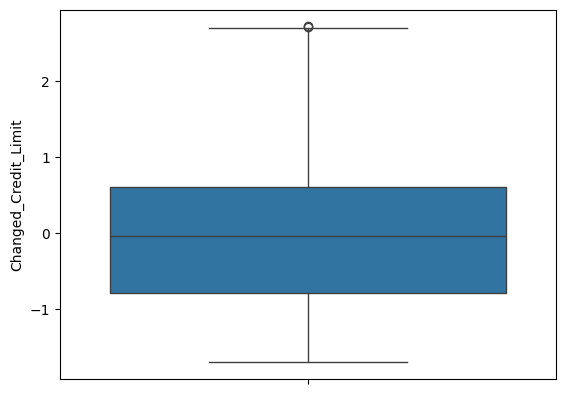

In [ ]:
sns.boxplot(data['Changed_Credit_Limit'])

<Axes: ylabel='Num_Credit_Inquiries'>

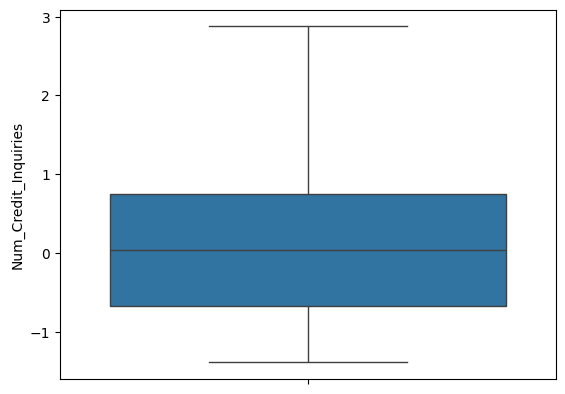

In [ ]:
sns.boxplot(data['Num_Credit_Inquiries'])

<Axes: ylabel='Outstanding_Debt'>

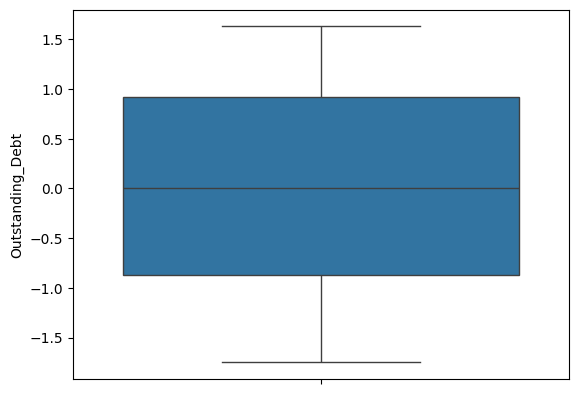

In [ ]:
sns.boxplot(data['Outstanding_Debt'])

<Axes: ylabel='Credit_Utilization_Ratio'>

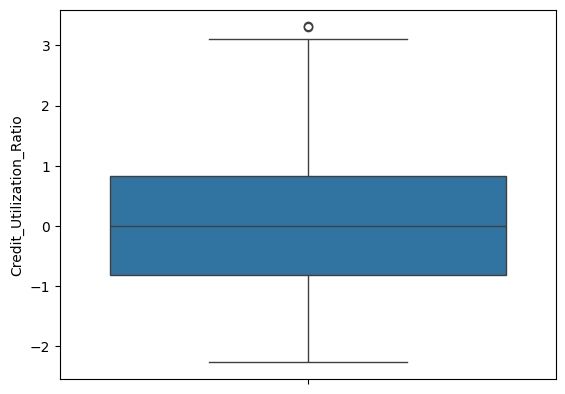

In [ ]:
sns.boxplot(data['Credit_Utilization_Ratio'])

<Axes: ylabel='Total_EMI_per_month'>

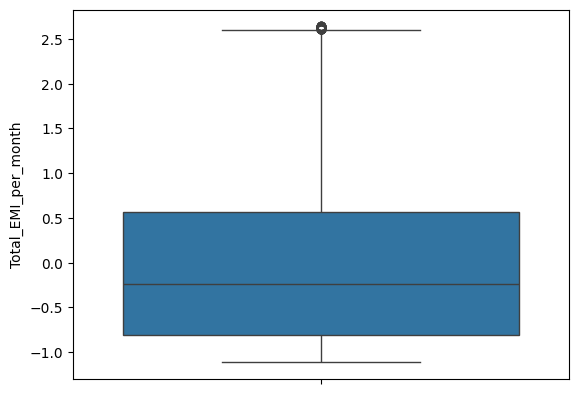

In [ ]:
sns.boxplot(data['Total_EMI_per_month'])

<Axes: ylabel='Amount_invested_monthly'>

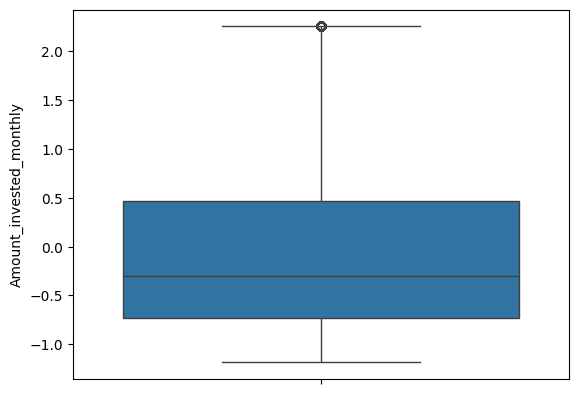

In [ ]:
sns.boxplot(data['Amount_invested_monthly'])

<Axes: ylabel='Monthly_Balance'>

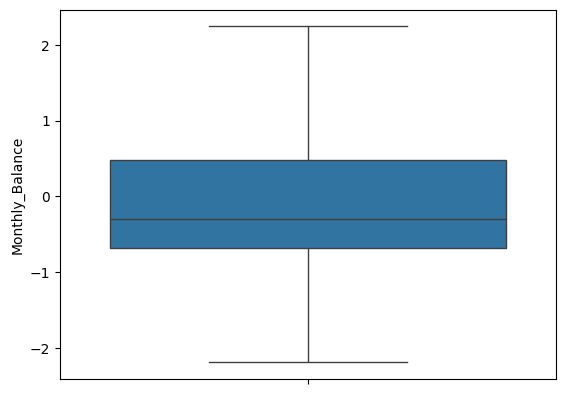

In [ ]:
sns.boxplot(data['Monthly_Balance'])

<Axes: ylabel='Credit_History_Age_Months'>

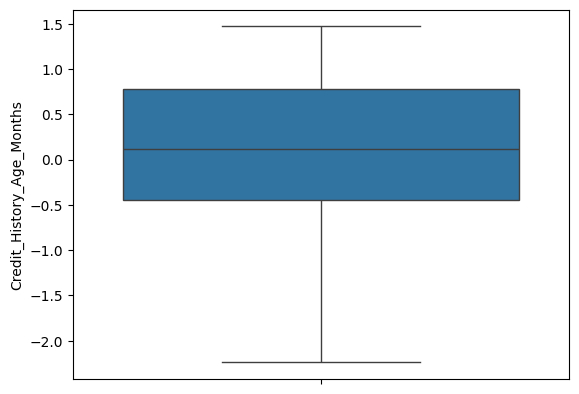

In [ ]:
sns.boxplot(data['Credit_History_Age_Months'])

<Axes: ylabel='Occupation'>

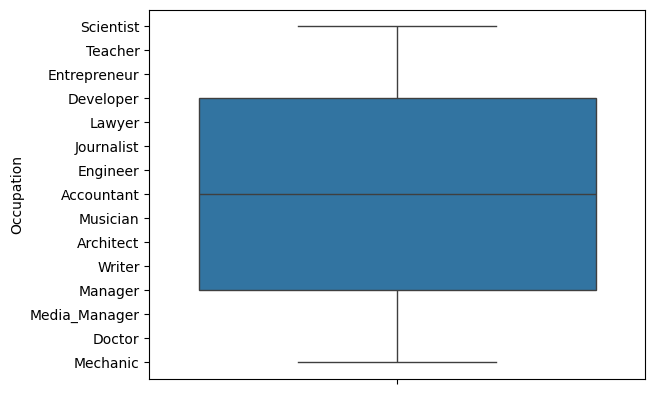

In [ ]:
sns.boxplot(df['Occupation'])

<Axes: ylabel='Credit_Score'>

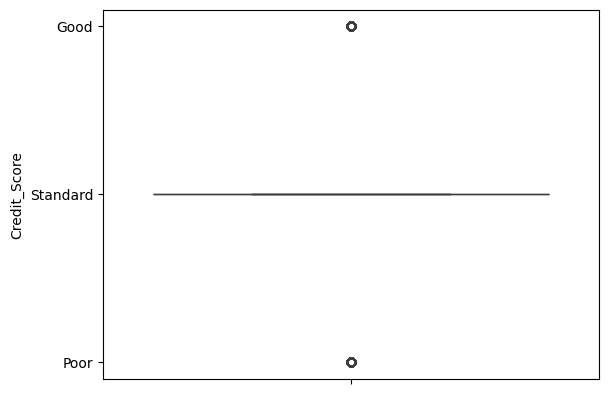

In [ ]:
sns.boxplot(df["Credit_Score"])

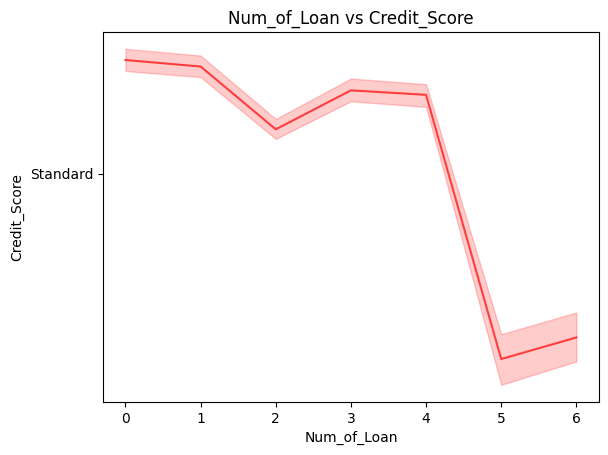

In [ ]:
sns.lineplot(x=df["Num_of_Loan"],y=df["Credit_Score"],color="red",alpha=0.7)
plt.title("Num_of_Loan vs Credit_Score")
plt.xlabel("Num_of_Loan")
plt.ylabel("Credit_Score")
plt.show()

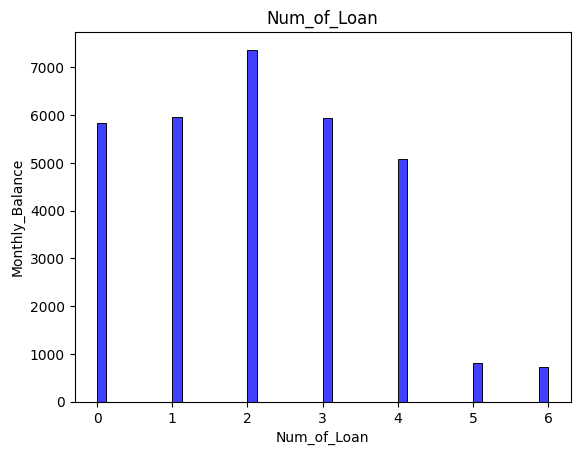

In [ ]:

sns.histplot(x=df['Num_of_Loan'], color='blue')
plt.title('Num_of_Loan')
plt.xlabel('Num_of_Loan')
plt.ylabel('Monthly_Balance')
plt.show()

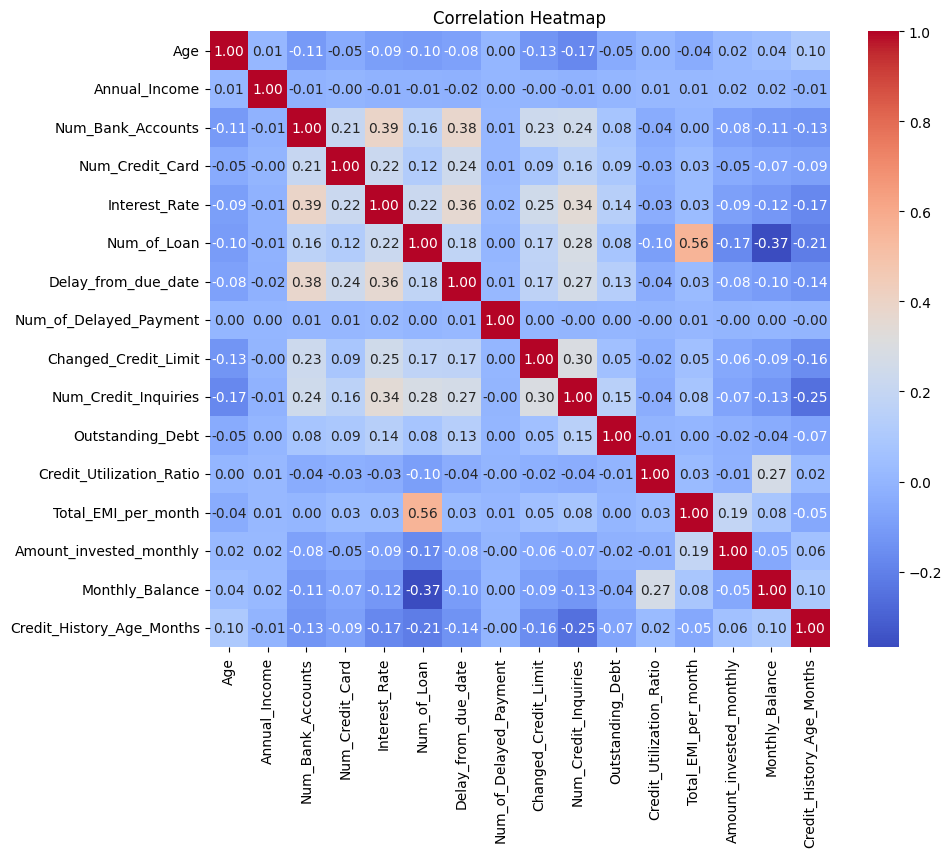

In [ ]:
#correlaation using heatmap

url = "https://drive.google.com/uc?id=1SZzVrF_t3WmgNdSUlo-XaTdkBGHMd54r&export=download"
df = pd.read_csv(url)

df_numerical = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = data.drop["Credit_Score"]
y = data["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 44)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

TypeError: 'method' object is not subscriptable